In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:

from scipy.stats import rv_continuous
from scipy.interpolate import interp1d
from matplotlib.patches import Circle
from scipy.special import gamma
import numpy as np
import emcee
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad, nquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from scipy.integrate import simps
from pymodelfit import FunctionModel1DAuto
import wkbl
from wkbl.astro.halo_info import *
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
import iminuit
from iminuit import Minuit, describe, Struct
import probfit
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
import warnings
import wkbl.astro.halo_info as h
warnings.filterwarnings('ignore')

# S and T

In [68]:

def readSnT(datafile):
    myfile = open(datafile)
    r = S = T = np.array([])
    for l in myfile:
        row =  l.split(" ")
        if l[0]=="#" and row[1]=='r200':
            r200 = np.float(row[3] )
        if l[0]=="#":continue
        r = np.append(r,row[0])
        S = np.append(S,row[1])
        T = np.append(T,row[2])
    return r, S, T,r200
HaloB_r, HaloB_S, HaloB_T,HaloB_r200 = readSnT("../../datafiles/HALO_B_S_and_T.txt")
HaloC_r, HaloC_S, HaloC_T,HaloC_r200 = readSnT("../../datafiles/HALO_C_S_and_T.txt")
Mochima_r, Mochima_S, Mochima_T, Mochima_r200 = readSnT("../../datafiles/Mochima_S_and_T.txt")
Adicora_r, Adicora_S, Adicora_T, Adicora_r200 = readSnT("../../datafiles/Adicora_S_and_T.txt")


HaloB_r_DMO, HaloB_S_DMO, HaloB_T_DMO,HaloB_r200_DMO = readSnT("../../datafiles/HALOB_S_and_T_DMO.txt")
HaloC_r_DMO, HaloC_S_DMO, HaloC_T_DMO,HaloC_r200_DMO = readSnT("../../datafiles/HALOC_S_and_T_DMO.txt")
Mochima_r_DMO, Mochima_S_DMO, Mochima_T_DMO, Mochima_r200_DMO = readSnT("../../datafiles/Mochima_S_and_T_DMO.txt")
Adicora_r_DMO, Adicora_S_DMO, Adicora_T_DMO, Adicora_r200_DMO = readSnT("../../datafiles/Adicora_S_and_T_DMO.txt")


In [69]:
HB_color = "#097220"
HC_color = "#4c0972"
Mo_color = "#094272"
Ad_color = "#C70039"

font=15

<IPython.core.display.Javascript object>


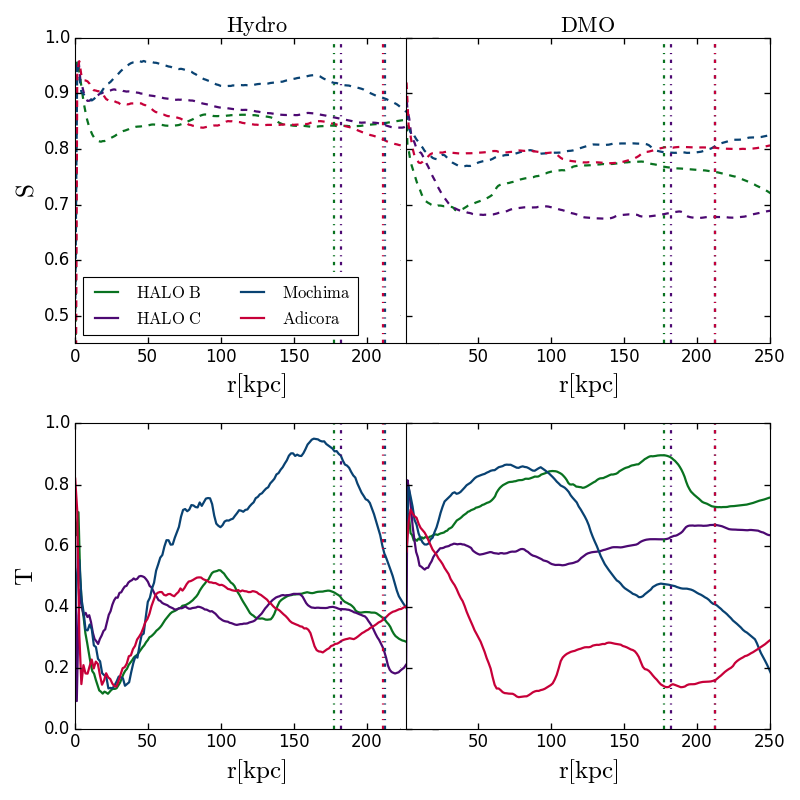

In [70]:
fig, [[ax,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=[10,10])
ax.set_ylabel(r"$\rm S$",fontsize=1.5*font)
ax2.set_ylabel(r"$\rm T$",fontsize=1.5*font)
ax2.set_xlabel(r"$\rm r [kpc]$",fontsize=1.5*font)
ax3.set_xlabel(r"$\rm r [kpc]$",fontsize=1.5*font)

ax.set_xlabel(r"$\rm r [kpc]$",fontsize=1.5*font)
ax1.set_xlabel(r"$\rm r [kpc]$",fontsize=1.5*font)

ax.plot(HaloB_r,HaloB_S,ls='--',lw=2,color=HB_color)
ax.plot(HaloC_r,HaloC_S,ls='--',lw=2,color=HC_color)
ax.plot(Mochima_r,Mochima_S,ls='--',lw=2,color=Mo_color)
ax.plot(Adicora_r,Adicora_S,ls='--',lw=2,color=Ad_color)
ax2.plot(HaloB_r,HaloB_T,ls='-',lw=2,color=HB_color)
ax2.plot(HaloC_r,HaloC_T,ls='-',lw=2,color=HC_color)
ax2.plot(Mochima_r,Mochima_T,ls='-',lw=2,color=Mo_color)
ax2.plot(Adicora_r,Adicora_T,ls='-',lw=2,color=Ad_color)

ax.plot(1,1000,ls='-',lw=2,color=HB_color,label=r"$\rm HALO\,\,B$")
ax.plot(1,1000,ls='-',lw=2,color=HC_color,label=r"$\rm HALO\,\,C$")
ax.plot(1,1000,ls='-',lw=2,color=Mo_color,label=r"$\rm Mochima$")
ax.plot(1,1000,ls='-',lw=2,color=Ad_color,label=r"$\rm Adicora$")


ax.set_ylim(0.45,1)
ax1.set_ylim(0.45,1)
ax.set_xlim(0,249)
ax2.set_xlim(0,249)

ax1.set_xlim(1,250)
ax3.set_xlim(1,250)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)

ax1.plot(HaloB_r_DMO,HaloB_S_DMO,ls='--',lw=2,color=HB_color)
ax1.plot(HaloC_r_DMO,HaloC_S_DMO,ls='--',lw=2,color=HC_color)
ax1.plot(Mochima_r_DMO,Mochima_S_DMO,ls='--',lw=2,color=Mo_color)
ax1.plot(Adicora_r_DMO,Adicora_S_DMO,ls='--',lw=2,color=Ad_color)



ax3.plot(HaloB_r_DMO,HaloB_T_DMO,ls='-',lw=2,color=HB_color)
ax3.plot(HaloC_r_DMO,HaloC_T_DMO,ls='-',lw=2,color=HC_color)
ax3.plot(Mochima_r_DMO,Mochima_T_DMO,ls='-',lw=2,color=Mo_color)
ax3.plot(Adicora_r_DMO,Adicora_T_DMO,ls='-',lw=2,color=Ad_color)
legend = ax.legend(loc='lower left', ncol=2, shadow=False, fontsize=font)
frame = legend.get_frame()
ax.tick_params(axis='y', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='y', which='minor', labelsize=15, size=3,width=1.2)
ax.tick_params(axis='x', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='x', which='minor', labelsize=15, size=3,width=1.2)
ax1.tick_params(axis='y', which='major', labelsize=0, size=5,width=1.2)
ax1.tick_params(axis='y', which='minor', labelsize=0, size=3,width=1.2)
ax1.tick_params(axis='x', which='major', labelsize=15, size=5,width=1.2)
ax1.tick_params(axis='x', which='minor', labelsize=15, size=3,width=1.2)
ax2.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax2.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax3.tick_params(axis='y', which='major', labelsize=0, size=5,width=1.2)
ax3.tick_params(axis='y', which='minor', labelsize=0, size=3,width=1.2)
ax3.tick_params(axis='x', which='major', labelsize=15, size=5,width=1.2)
ax3.tick_params(axis='x', which='minor', labelsize=15, size=3,width=1.2)
ax.axvline(x=HaloB_r200,lw=2,ls='-.',color=HB_color)
ax1.axvline(x=HaloB_r200_DMO,lw=2,ls='-.',color=HB_color)
ax.axvline(x=HaloC_r200,lw=2,ls='-.',color=HC_color)
ax1.axvline(x=HaloC_r200_DMO,lw=2,ls='-.',color=HC_color)
ax.axvline(x=Mochima_r200,lw=2,ls='-.',color=Mo_color)
ax1.axvline(x=Mochima_r200_DMO,lw=2,ls='-.',color=Mo_color)
ax1.axvline(x=Adicora_r200_DMO,lw=2,ls='-.',color=Ad_color)
ax.axvline(x=Adicora_r200,lw=2,ls='-.',color=Ad_color)
ax2.axvline(x=HaloB_r200,lw=2,ls='-.',color=HB_color)
ax3.axvline(x=HaloB_r200_DMO,lw=2,ls='-.',color=HB_color)
ax2.axvline(x=HaloC_r200,lw=2,ls='-.',color=HC_color)
ax3.axvline(x=HaloC_r200_DMO,lw=2,ls='-.',color=HC_color)
ax2.axvline(x=Mochima_r200,lw=2,ls='-.',color=Mo_color)
ax3.axvline(x=Mochima_r200_DMO,lw=2,ls='-.',color=Mo_color)
ax3.axvline(x=Adicora_r200_DMO,lw=2,ls='-.',color=Ad_color)
ax2.axvline(x=Adicora_r200,lw=2,ls='-.',color=Ad_color)
ax.set_title(r"$\rm Hydro$",fontsize=20 )
ax1.set_title(r"$\rm DMO$",fontsize=20 )
fig.tight_layout(w_pad=-2.86)
plt.savefig("/home/arturo/Documents/LAM/LAM2LUPM/General_Plots/S_n_T_all.pdf")

# $\beta(r)$

In [44]:
def readbeta(datafile):
    myfile = open(datafile)
    r = beta = np.array([])
    for l in myfile:
        row =  l.split(" ")
        if l[0]=="#" and row[1]=='r200':
            r200 = np.float(row[3] )
        if l[0]=="#":continue
        r = np.append(r,row[0])
        beta = np.append(beta,row[1])
    return r, beta,r200
HaloB_r, HaloB_beta,HaloB_r200 = readbeta("../../datafiles/HALO_B_Beta.txt")
HaloC_r, HaloC_beta,HaloC_r200 = readbeta("../../datafiles/HALO_C_Beta.txt")
Mochima_r, Mochima_beta, Mochima_r200 = readbeta("../../datafiles/Mochima_Beta.txt")
Adicora_r, Adicora_beta, Adicora_r200 = readbeta("../../datafiles/Adicora_Beta.txt")


<IPython.core.display.Javascript object>


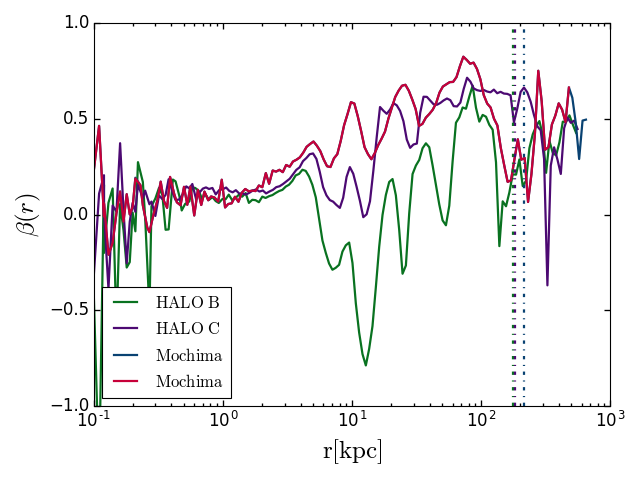

In [45]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$\beta(r)$",fontsize=1.5*font)
ax.set_xlabel(r"$\rm r[kpc]$",fontsize=1.5*font)

ax.set_xscale("log")
ax.set_ylim([-1.,1])
ax.plot(HaloB_r,HaloB_beta,ls='-',lw=2,color=HB_color,label=r"$\rm HALO\,\,B$")
ax.plot(HaloC_r,HaloC_beta,ls='-',lw=2,color=HC_color,label=r"$\rm HALO\,\,C$")
ax.plot(Mochima_r,Mochima_beta,ls='-',lw=2,color=Mo_color,label=r"$\rm Mochima$")
ax.plot(Adicora_r,Adicora_beta,ls='-',lw=2,color=Ad_color,label=r"$\rm Mochima$")
#ax.plot(1,1000,ls='-',lw=2,color=HB_color,label=r"$\rm HALO\,\,B$")
#ax.plot(1,1000,ls='-',lw=2,color=HC_color,label=r"$\rm HALO\,\,C$")
#ax.plot(1,1000,ls='-',lw=2,color=Mo_color,label=r"$\rm Mochima$")
#ax.set_ylim(0.45,1)
legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=font)
frame = legend.get_frame()
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)

ax.axvline(x=HaloB_r200,lw=2,ls='-.',color=HB_color)
ax.axvline(x=HaloC_r200,lw=2,ls='-.',color=HC_color)
ax.axvline(x=Mochima_r200,lw=2,ls='-.',color=Mo_color)
plt.tight_layout()
plt.savefig("/home/arturo/Documents/LAM/LAM2LUPM/General_Plots/Beta_r_all.pdf")

In [47]:
def readMomemts(datafile):
    myfile = open(datafile)
    r = m1 = m2 = m3 =  np.array([])
    for l in myfile:
        row =  l.split(" ")
        if l[0]=="#" and row[1]=='r200':
            r200 = np.float(row[3] )
        if l[0]=="#":continue
        r = np.append(r,float(row[0]))
        m1 = np.append(m1,float(row[1]))
        m2 = np.append(m2,float(row[2]))
        m3 = np.append(m3,float(row[3]))
    return r, m1, m2, m3, r200
HaloB_r, HaloB_m1, HaloB_m2,HaloB_m3,HaloB_r200 = readMomemts("../../datafiles/HALO_B_Moments.txt")
HaloC_r, HaloC_m1, HaloC_m2,HaloC_m3,HaloC_r200 = readMomemts("../../datafiles/HALO_C_Moments.txt")
Mochima_r, Mochima_m1, Mochima_m2, Mochima_m3, Mochima_r200 = readMomemts("../../datafiles/Mochima_Moments.txt")
Adicora_r, Adicora_m1, Adicora_m2, Adicora_m3, Adicora_r200 = readMomemts("../../datafiles/Adicora_Moments.txt")

<IPython.core.display.Javascript object>


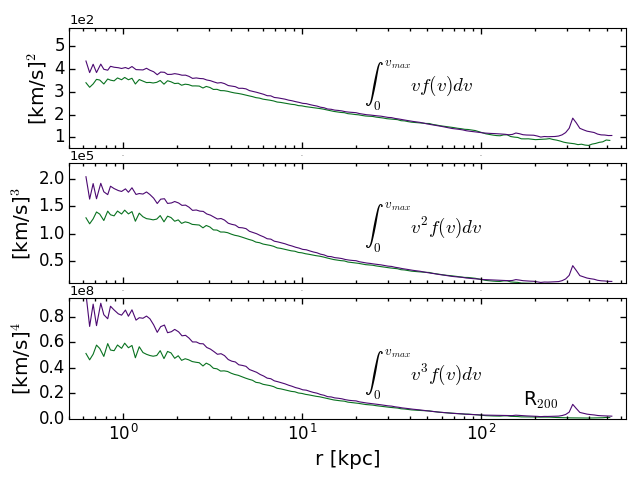

In [48]:
fig, ax = plt.subplots(3,1)
ax[0].yaxis.get_major_formatter().set_powerlimits((0, 2))
ax[1].yaxis.get_major_formatter().set_powerlimits((0, 2))
ax[2].yaxis.get_major_formatter().set_powerlimits((0, 2))

ax[2].set_xlabel('r [kpc]',fontsize=18)
ax[0].set_ylabel('[km/s]$^2$',fontsize=18)
ax[1].set_ylabel(r'[km/s]$^3$',fontsize=18)
ax[2].set_ylabel(r'[km/s]$^4$',fontsize=18)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_ylim([52,1.6*np.max(HaloB_m1)])
ax[1].set_ylim([1e4,1.6*np.max(HaloB_m2)])
ax[2].set_ylim([1e4,1.6*np.max(HaloB_m3)])
ax[0].set_xlim([0.5,3*Mochima_r200])
ax[1].set_xlim([0.5,3*Mochima_r200])
ax[2].set_xlim([0.5,3*Mochima_r200])
#ax[0].axvline(x=myhydro.r200,color='k',linestyle='--')
#ax[1].axvline(x=myhydro.r200,color='k',linestyle='--')
#ax[2].axvline(x=myhydro.r200,color='k',linestyle='--')

ax[0].plot(HaloB_r,HaloB_m1,color=HB_color)
ax[1].plot(HaloB_r,HaloB_m2,color=HB_color)
ax[2].plot(HaloB_r,HaloB_m3,color=HB_color)

ax[0].plot(HaloC_r,HaloC_m1,color=HC_color)
ax[1].plot(HaloC_r,HaloC_m2,color=HC_color)
ax[2].plot(HaloC_r,HaloC_m3,color=HC_color)

ax[0].plot(Mochima_r,Mochima_m1,color=Mo_color)
ax[1].plot(Mochima_r,Mochima_m2,color=Mo_color)
ax[2].plot(Mochima_r,Mochima_m3,color=Mo_color)

ax[0].plot(Adicora_r,Adicora_m1,color=Ad_color)
ax[1].plot(Adicora_r,Adicora_m2,color=Ad_color)
ax[2].plot(Adicora_r,Adicora_m3,color=Ad_color)

fig.tight_layout(h_pad=-1.6)
ax[0].text(22,300,r'$\int_0 ^{v_{max}} v f(v) dv$',fontsize=17)
ax[1].text(22,100000,r'$\int_0 ^{v_{max}} v^2 f(v) dv$',fontsize=17)
ax[2].text(22,3e7,r'$\int_0 ^{v_{max}} v^3 f(v) dv$',fontsize=17)
ax[2].text(170,1e7,r'R$_{200}$',fontsize=17)


ax[0].tick_params(axis='y', which='major', labelsize=15, size=5,width=1.2)
ax[0].tick_params(axis='x', which='major', labelsize=0, size=5,width=1.2)
ax[0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1].tick_params(axis='y', which='major', labelsize=15, size=5,width=1.2)
ax[1].tick_params(axis='x', which='major', labelsize=0, size=5,width=1.2)
ax[1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[2].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[2].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)


In [71]:
HB_hydro = h.HALOBHydro()
HB_dmo = h.HALOBdmo()
HC_hydro = h.HALOCHydro()
HC_dmo = h.HALOCdmo()
Mo_hydro = h.MochimaHydro()
Mo_dmo = h.Mochimadmo()
Ad_hydro = h.AdicoraHydro()
Ad_dmo = h.Adicoradmo()



<IPython.core.display.Javascript object>


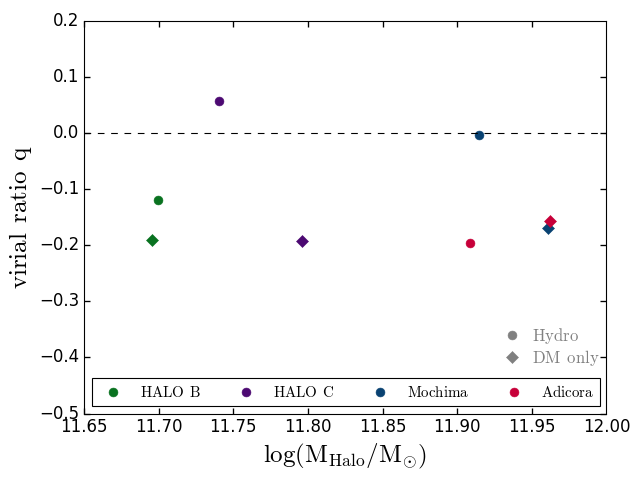

In [78]:
fig, ax = plt.subplots()
scattersize= 8
ax.set_ylim(-.5,.2)
ax.set_xlabel(r"$\rm log(M_{Halo}/M_{\odot})$",fontsize=1.5*font)
ax.set_ylabel(r"$\rm virial\,\,\, ratio\,\,\, q$",fontsize=1.5*font)


ax.plot( np.log10(HB_hydro.M200_dm), HB_hydro.q,color=HB_color,markeredgecolor=HB_color,markersize=scattersize,marker="o", lw=0,label=r"$\rm HALO\,\,\, B$" )
ax.plot( np.log10(HC_hydro.M200_dm), HC_hydro.q,color=HC_color,markeredgecolor=HC_color,markersize=scattersize,marker="o", lw=0,label=r"$\rm HALO\,\,\, C$" )
ax.plot( np.log10(Mo_hydro.M200_dm), Mo_hydro.q,color=Mo_color,markeredgecolor=Mo_color,markersize=scattersize,marker="o", lw=0,label=r"$\rm Mochima$" )
ax.plot( np.log10(Ad_hydro.M200_dm), Ad_hydro.q,color=Ad_color,markeredgecolor=Ad_color,markersize=scattersize,marker="o", lw=0,label=r"$\rm Adicora$" )

ax.plot( np.log10(HB_dmo.M200_dm), HB_dmo.q,color=HB_color,markeredgecolor=HB_color,markersize=scattersize,marker="D", lw=0)
ax.plot( np.log10(HC_dmo.M200_dm), HC_dmo.q,color=HC_color,markeredgecolor=HC_color,markersize=scattersize,marker="D", lw=0)
ax.plot( np.log10(Mo_dmo.M200_dm), Mo_dmo.q,color=Mo_color,markeredgecolor=Mo_color,markersize=scattersize,marker="D", lw=0)
ax.plot( np.log10(Ad_dmo.M200_dm), Ad_dmo.q,color=Ad_color,markeredgecolor=Ad_color,markersize=scattersize,marker="D", lw=0)

ax.plot( 11.937, -0.4,color='gray',markeredgecolor='gray',markersize=scattersize,marker="D", lw=0)
ax.text(11.95,-0.41,r"$\rm DM\,\,\, only$",fontsize=font,color='gray')
ax.plot( 11.937, -0.36,color='gray',markeredgecolor='gray',markersize=scattersize,marker="o", lw=0)
ax.text(11.95,-0.37,r"$\rm Hydro\,$",fontsize=font,color='gray')

ax.axhline(y=0,linestyle='--',color='k')
plt.tight_layout()

legend = ax.legend(loc='lower left',numpoints=1, ncol=4, shadow=False, fontsize=0.9*font)
#ax.legend(numpoints=1)
frame = legend.get_frame()
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
plt.savefig("/home/arturo/Documents/LAM/LAM2LUPM/General_Plots/q_parameter.pdf")

# Stellar to Halo Mass Ratio (SHMR)

## Rodrigues-Puebla

In [33]:
def M_st_RP(M):
    def P(x,y,z):return y*z - x*z/1+z
    def Q(z): return np.exp(-4/(1+z)**2)
    Z = 0.
    log_ep = (-1.758) + P(0.11, -0.061,Z)*Q(Z) + P(-0.023,0.,0.)
    log_M0 = 11.548 + P(-1.297,-0.026,Z)*Q(Z)
    al = 1.975 + P(0.714,0.042,Z)*Q(Z)
    de = 3.390 + P(-0.472,-0.931,Z)*Q(Z) 
    ga = 0.498 + P(-0.157,0.,Z)*Q(Z)
    def g(x): 
        first = de * ((np.log10(1.+np.exp(x)))**ga)/(1.+np.exp(10.**-x))
        second = np.log10(1. + 10.**(-al*x))
        return first - second
    M0 = 10**log_M0
    return log_ep + log_M0 + g(np.log10(M/M0)) - g(0)


## Kravtsov

In [34]:
def M_st_K(M):
    """
    SHMR from kravtsov et al 2014 https://arxiv.org/abs/1401.7329
    """
    M1, ep, al, de, ga   = 10**(11.39), 10**(-1.618), 1.795, 4.345, 0.619
    #M1, ep, al, de, ga   = 10**11.45, 10**(-1.702), 1.736, 4.273, 0.613
    def f(x):
        second_up = ((np.log10(1.+np.exp(x)))**ga)
        second_down = (1.+np.exp(10**(-x)))
        return -np.log10(10**(-al*x)+1)+ (de*second_up / second_down)
    return np.log10(ep*M1) + f(np.log10(M/M1)) - f(0)

## Moster


In [35]:
# Moster et all
def M_1(z):
    M10 ,M11 = 11.590, 1.195
    log = M10 + M11*(z / (z+1))
    return 10**(log)

def N(z):
    N10 ,N11 = 0.0351, -0.0247
    return N10 + N11*(z / (z+1))


def beta(z):
    B10 ,B11 = 1.376, -0.826
    return B10 + B11*(z / (z+1))


def gamma(z):
    G10 ,G11 = 0.608, 0.329
    return G10 + G11*(z / (z+1))

def mm(M,z=0):
    one = ( M / M_1(z))**(-beta(z))
    two = ( M / M_1(z))**gamma(z)
    return 2*N(z) * M / (one +two)

def alpha(m):
    return 0.15 / np.log10(m)

M = np.logspace(10,15,50)
m = mm(M)
al = np.sqrt(m)#alpha(m)

## Behroozi, Wechsler & Conroy

In [36]:
def M_st_B(M):
    def P(x,y,z):return y*z - x*z/1+z
    def Q(z): return np.exp(-4/(1+z)**2)
    Z = 0.
    log_ep = -1.777
    log_M0 = 11.514 
    al = -1.412
    de = 3.508
    ga = 0.316
    def g(x): 
        first = de * ((np.log10(1.+np.exp(x)))**ga)/(1.+np.exp(10.**-x))
        second = np.log10(1. + 10.**(al*x))
        return first - second
    M0 = 10**log_M0
    return log_ep + log_M0 + g(np.log10(M/M0)) - g(0)

<IPython.core.display.Javascript object>


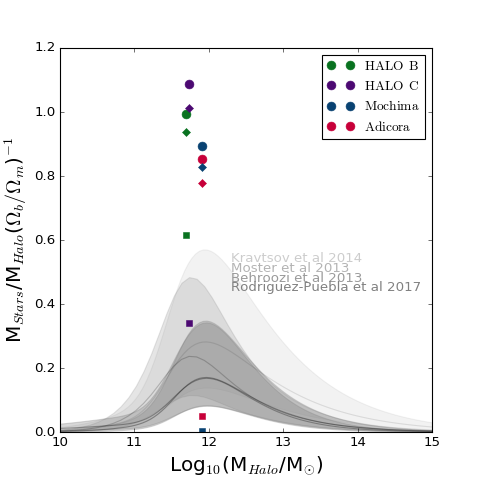

11.91460756777108 0.893944004869


In [38]:
fig, ax = plt.subplots(figsize=[6,6])
ax.set_xlim([10,15])
ax.set_ylim([0,1.2])
scattersize = 8
M_H = np.logspace(10,15,100)

rod = 10**M_st_RP(M_H)/M_H/0.16
rod1 = 10**(M_st_RP(M_H)+(1/np.sqrt(M_st_RP(M_H)))) /M_H/0.16
rod2 = 10**(M_st_RP(M_H)-(1/np.sqrt(M_st_RP(M_H)))) /M_H/0.16

kra = 10**M_st_K(M_H)/M_H/0.16
kra1 = 10**(M_st_K(M_H)+(1/np.sqrt(M_st_K(M_H)))) /M_H/0.16
kra2 = 10**(M_st_K(M_H)-(1/np.sqrt(M_st_K(M_H)))) /M_H/0.16

beh = (10**M_st_B(M_H)/M_H)/0.16
beh1 = 10**(M_st_B(M_H)+(1/np.sqrt(M_st_B(M_H)))) /M_H/0.16
beh2 = 10**(M_st_B(M_H)-(1/np.sqrt(M_st_B(M_H)))) /M_H/0.16

mos = m/M/0.16
mos1 = 10**(np.log10(m)+(1/np.sqrt(np.log10(m))))/M/0.16
mos2 = 10**(np.log10(m)-(1/np.sqrt(np.log10(m))))/M/0.16


ax.fill_between(np.log10(M_H), kra2,kra1,color='gray',alpha=0.1 )
ax.plot(np.log10(M_H),kra,"k",alpha=0.1)

ax.fill_between(np.log10(M), mos2,mos1,color='gray',alpha=0.2 )
ax.plot(np.log10(M),mos,"k",alpha=0.2)

ax.fill_between(np.log10(M_H), beh2,beh1,color='gray',alpha=0.3 )
ax.plot(np.log10(M_H),beh,"k",alpha=0.3)


ax.fill_between(np.log10(M_H), rod2,rod1,color='gray',alpha=0.3 )
ax.plot(np.log10(M_H),rod,"k",alpha=0.3)


######### points
#M200

ax.plot( np.log10(HB_hydro.M200_dm), HB_hydro.M200_st/HB_hydro.M200_dm/0.16,
        color=HB_color,markeredgecolor=HB_color,markersize=scattersize,marker="o", lw=0,label=r"$\rm HALO\,\,\, B$" )
ax.plot( np.log10(HC_hydro.M200_dm), HC_hydro.M200_st/HC_hydro.M200_dm/0.16,
        color=HC_color,markeredgecolor=HC_color,markersize=scattersize,marker="o", lw=0,label=r"$\rm HALO\,\,\, C$" )
ax.plot( np.log10(Mo_hydro.M200_dm), Mo_hydro.M200_st/Mo_hydro.M200_dm/0.16,
        color=Mo_color,markeredgecolor=Mo_color,markersize=scattersize,marker="o", lw=0,label=r"$\rm Mochima$" )
ax.plot( np.log10(Ad_hydro.M200_dm), Ad_hydro.M200_st/Ad_hydro.M200_dm/0.16,
        color=Ad_color,markeredgecolor=Ad_color,markersize=scattersize,marker="o", lw=0,label=r"$\rm Adicora$" )
#############
ax.plot( np.log10(HB_hydro.M200_dm), HB_hydro.M10_st/HB_hydro.M200_dm/0.16,
        color=HB_color,markeredgecolor=HB_color,markersize=scattersize*.6,marker="D", lw=0 )
ax.plot( np.log10(HC_hydro.M200_dm), HC_hydro.M10_st/HC_hydro.M200_dm/0.16,
        color=HC_color,markeredgecolor=HC_color,markersize=scattersize*.6,marker="D", lw=0 )
ax.plot( np.log10(Mo_hydro.M200_dm), Mo_hydro.M10_st/Mo_hydro.M200_dm/0.16,
        color=Mo_color,markeredgecolor=Mo_color,markersize=scattersize*.6,marker="D", lw=0 )
ax.plot( np.log10(Ad_hydro.M200_dm), Ad_hydro.M10_st/Ad_hydro.M200_dm/0.16,
        color=Ad_color,markeredgecolor=Ad_color,markersize=scattersize*.6,marker="D", lw=0 )
##############
ax.plot( np.log10(HB_hydro.M200_dm), HB_hydro.Mfire_st/HB_hydro.M200_dm/0.16,
        color=HB_color,markeredgecolor=HB_color,markersize=scattersize*.6,marker="s", lw=0 )
ax.plot( np.log10(HC_hydro.M200_dm), HC_hydro.Mfire_st/HC_hydro.M200_dm/0.16,
        color=HC_color,markeredgecolor=HC_color,markersize=scattersize*.6,marker="s", lw=0 )
ax.plot( np.log10(Mo_hydro.M200_dm), Mo_hydro.Mfire_st/Mo_hydro.M200_dm/0.16,
        color=Mo_color,markeredgecolor=Mo_color,markersize=scattersize*.6,marker="s", lw=0 )
ax.plot( np.log10(Ad_hydro.M200_dm), Ad_hydro.Mfire_st/Ad_hydro.M200_dm/0.16,
        color=Ad_color,markeredgecolor=Ad_color,markersize=scattersize*.6,marker="s", lw=0 )




ax.text(12.3, 0.53, "Kravtsov et al 2014",color="gray",alpha=0.4)
ax.text(12.3, 0.5, "Moster et al 2013",color="gray",alpha=0.6)
ax.text(12.3, 0.47, "Behroozi et al 2013",color="gray",alpha=0.8)
ax.text(12.3, 0.44, "Rodriguez-Puebla et al 2017",color="gray",alpha=1)
#ax.plot(np.log10(M_halo[:-2]),M_star[:-2]/M_halo[:-2]/0.16,lw=1.2,alpha=0.3)#,label="Eagle Simulation")
#ax.plot(np.log10(M_halo[-2:]),M_star[-2:]/M_halo[-2:]/0.16,lw=1.2,alpha=0.3,c='r')#,label="Apostle Simulation")

#print (sims[1,5]/sims[1,8]/0.16)


legend = ax.legend(loc='upper right', ncol=1,shadow=False,
                    fontsize=12)
ax.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax.set_ylabel(r'M$_{Stars}$/M$_{Halo}$($\Omega_b / \Omega_m $)$^{-1}$',fontsize=18)

print (np.log10(8.215e11)), 1.175e11/8.215e11/0.16
plt.savefig("/home/arturo/Documents/LAM/LAM2LUPM/General_Plots/SHMR_all.pdf")